Downloading the requirements

In [2]:
!pip install ultralytics opencv-python


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 23.6 MB/s eta 0:00:00


Using Yolo-V8

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.

0: 448x640 1 person, 461.4ms
Speed: 25.1ms preprocess, 461.4ms inference, 45.1ms postprocess per image at shape (1, 3, 448, 640)


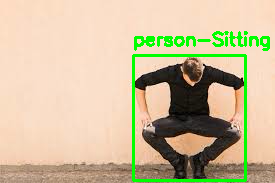

In [3]:
from google.colab.patches import cv2_imshow
import cv2
from ultralytics import YOLO


model = YOLO("yolov8n.pt")
source = "images.jpg" ## Change for Video
cap = cv2.VideoCapture(source)


while True:
    ret, frame = cap.read()
    if not ret:
        break

    results = model(frame)[0]

    for box in results.boxes:
      # Coordinates of the bounding boxes.
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        cls = int(box.cls[0])
        label = model.names[cls]

        # For person
        posture = ""
        if label == "person":
            h = y2 - y1
            w = x2 - x1
            ratio = h / (w + 1e-6)

            if ratio > 2:
                posture = "Standing"
            elif ratio > 1:
                posture = "Sitting"
            else:
                posture = "Bending"

        text = label if posture == "" else f"{label}-{posture}"

#Drawing bounding box and names in the picture
        cv2.rectangle(frame, (x1, y1), (x2, y2), (0,255,0), 2)
        cv2.putText(frame, text, (x1, y1-10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,255,0), 2)

    cv2_imshow(frame)

    if cv2.waitKey(1) == 27:
        break

cap.release()
cv2.destroyAllWindows()


Explanation



*   Utilized pretrained YOLO v8, for objec detection
*   MOdel outputs bounding boxes, class labels and confience scores

*   For persons, High Box ratio - Standing; Low Box Ratio - Bending



